In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import NullFormatter
import calculus as cal

np.set_printoptions(precision=4, suppress=True)

In [2]:
# define the broken/good cobras
#brokens = [1, 2, 39, 43, 54]
brokens = []
visibles= [e for e in range(1,58) if e not in brokens]
badIdx = np.array(brokens) - 1
goodIdx = np.array(visibles) - 1
mod = 'SC09'

# two groups for two cameras
cam_split = 28
group1 = goodIdx[goodIdx <= cam_split]
group2 = goodIdx[goodIdx > cam_split]

In [113]:
path = '/data/MCS/20200825_000/data/'
#path = '/home/pfs/Documents/cwen/data/20200504010/data/'
centers = np.load(path + 'thetaCenter.npy')
radius = np.load(path + 'thetaRadius.npy')
fw = np.load(path + 'thetaFW.npy')
rv = np.load(path + 'thetaRV.npy')
af = np.load(path + 'thetaAngFW.npy')
ar = np.load(path + 'thetaAngRV.npy')
sf = np.load(path + 'thetaSpeedFW.npy')
sr = np.load(path + 'thetaSpeedRV.npy')
badR = np.load(path + 'badRange.npy')
mf = np.load(path + 'thetaMMFW.npy')
mr = np.load(path + 'thetaMMRV.npy')
badM = np.load(path + 'badMotorMap.npy')
badR = np.load(path + 'badRange.npy')
steps = int(np.load(path + 'steps.npy'))
ontime = np.load(path + 'ontime.npy')

In [ ]:
steps, ontime

In [ ]:
path = '/data/MCS/20191228_027/data/'
centers = np.load(path + 'thetaCenter_A.npy')
radius = np.load(path + 'thetaRadius_A.npy')
fw = np.load(path + 'thetaFW_A.npy')
rv = np.load(path + 'thetaRV_A.npy')
af = np.load(path + 'thetaAngFW_A.npy')
ar = np.load(path + 'thetaAngRV_A.npy')
sf = np.load(path + 'thetaSpeedFW_A.npy')
sr = np.load(path + 'thetaSpeedRV_A.npy')
badR = np.load(path + 'badRange_A.npy')
mf = np.load(path + 'thetaMMFW_A.npy')
mr = np.load(path + 'thetaMMRV_A.npy')
bad = np.load(path + 'bad_A.npy')

In [ ]:
centers = np.load(path + 'thetaCenter_A.npy')
radius = np.load(path + 'thetaRadius_A.npy')
fw = np.load(path + 'thetaFW_A.npy')
rv = np.load(path + 'thetaRV_A.npy')
af = np.load(path + 'thetaAngFW_A.npy')
ar = np.load(path + 'thetaAngRV_A.npy')
sf = np.load(path + 'thetaSpeedFW_A.npy')
sr = np.load(path + 'thetaSpeedRV_A.npy')
badR = np.load(path + 'badRange_A.npy')
mf = np.load(path + 'thetaMMFW_A.npy')
mr = np.load(path + 'thetaMMRV_A.npy')
bad = np.load(path + 'bad_A.npy')
mf2 = np.load(path + 'thetaMMFW2_A.npy')
mr2 = np.load(path + 'thetaMMRV2_A.npy')
bad2 = np.load(path + 'bad2_A.npy')

In [ ]:
centers, radius

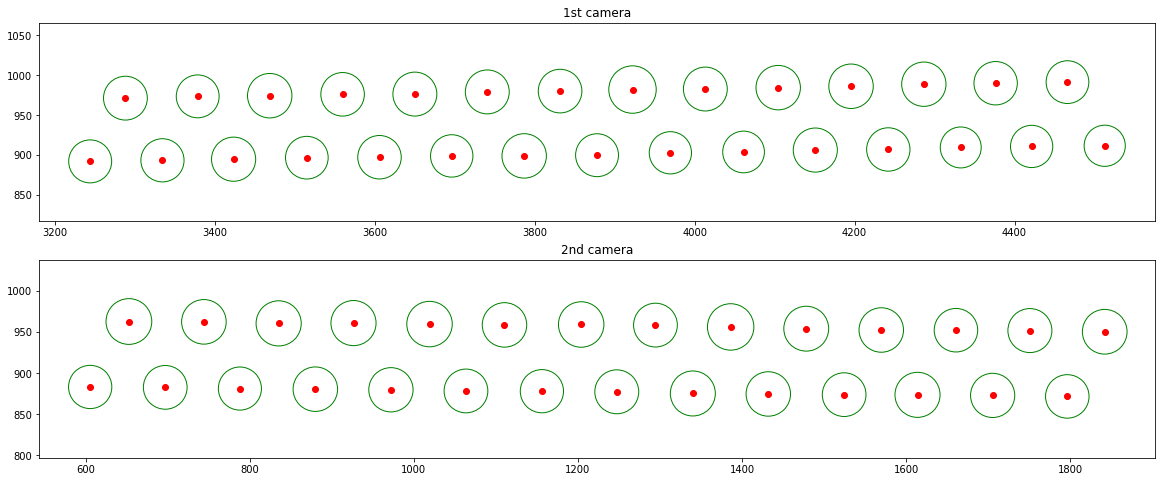

In [78]:
plt.figure(figsize=(20,8))
plt.clf()

plt.subplot(211)
ax = plt.gca()
ax.axis('equal')

ax.plot(centers[group1].real, centers[group1].imag, 'ro')
for idx in group1:
    c = plt.Circle((centers[idx].real, centers[idx].imag), radius[idx], color='g', fill=False)
    ax.add_artist(c)
ax.set_title(f'1st camera')

plt.subplot(212)
ax = plt.gca()
ax.axis('equal')

ax.plot(centers[group2].real, centers[group2].imag, 'ro')
for idx in group2:
    c = plt.Circle((centers[idx].real, centers[idx].imag), radius[idx], color='g', fill=False)
    ax.add_artist(c)
ax.set_title(f'2nd camera')

plt.show()

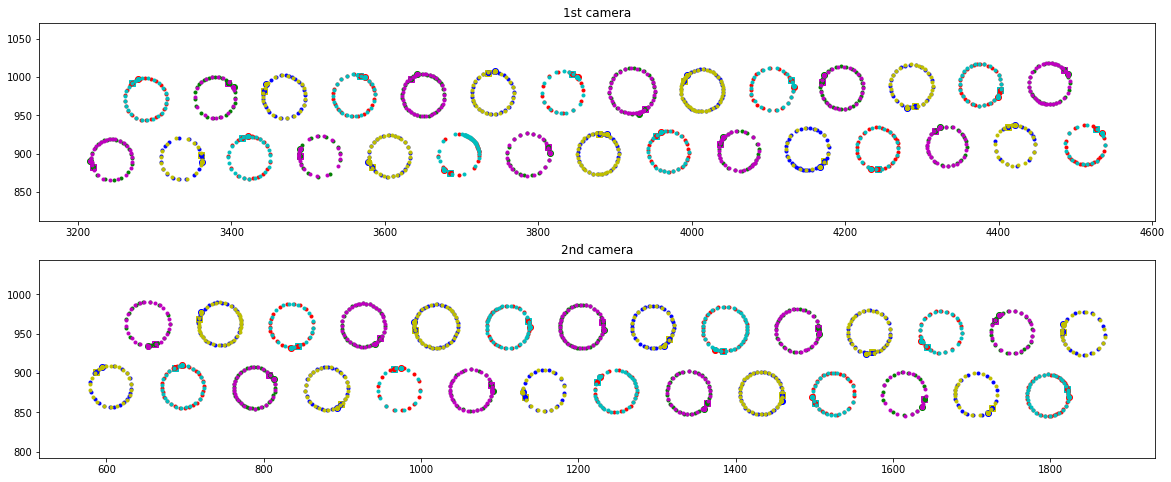

In [74]:
plt.figure(figsize=(20,8))
plt.clf()

plt.subplot(211)
ax = plt.gca()
ax.axis('equal')
ax.set_title(f'1st camera')

for n in range(fw.shape[1]):
    for k in group1:
        if k % 3 == 0:
            c = 'r'
            d = 'c'
        elif k % 3 == 1:
            c = 'g'
            d = 'm'
        else:
            c = 'b'
            d = 'y'
        ax.plot(fw[k][n,0].real, fw[k][n,0].imag, c + 'o')
        ax.plot(rv[k][n,0].real, rv[k][n,0].imag, d + 's')
        ax.plot(fw[k][n,1:].real, fw[k][n,1:].imag, c + '.')
        ax.plot(rv[k][n,1:].real, rv[k][n,1:].imag, d + '.')

plt.subplot(212)
ax = plt.gca()
ax.axis('equal')
ax.set_title(f'2nd camera')

for n in range(fw.shape[1]):
    for k in group2:
        if k % 3 == 0:
            c = 'r'
            d = 'c'
        elif k % 3 == 1:
            c = 'g'
            d = 'm'
        else:
            c = 'b'
            d = 'y'
        ax.plot(fw[k][n,0].real, fw[k][n,0].imag, c + 'o')
        ax.plot(rv[k][n,0].real, rv[k][n,0].imag, d + 's')
        ax.plot(fw[k][n,1:].real, fw[k][n,1:].imag, c + '.')
        ax.plot(rv[k][n,1:].real, rv[k][n,1:].imag, d + '.')

plt.show()

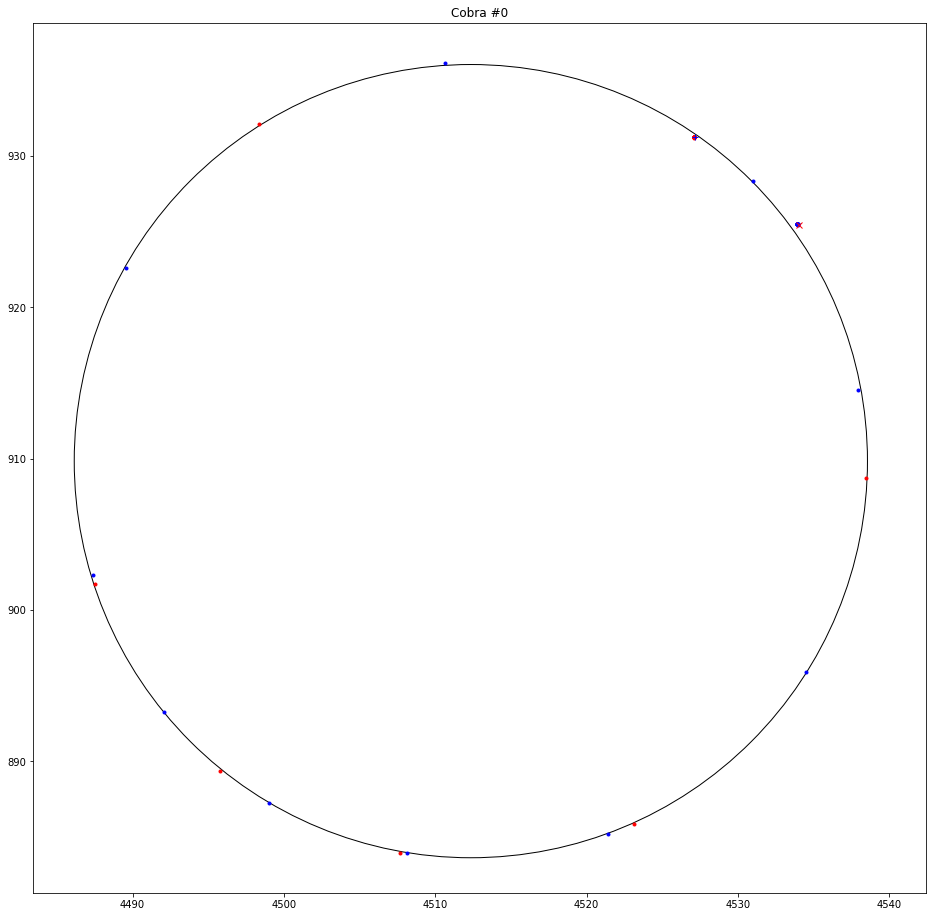

In [114]:
plt.figure(figsize=(16,16))
ax = plt.gca()
ax.axis('equal')
k = 0
ax.set_title(f'Cobra #{k}')

c = plt.Circle((centers[k].real, centers[k].imag), radius[k], fill=False)
ax.add_artist(c)

for n in range(fw.shape[1]):
    c = 'r'
    d = 'b'
    ax.plot(fw[k][n,1:].real, fw[k][n,1:].imag, c + '.')
    ax.plot(rv[k][n,1:].real, rv[k][n,1:].imag, d + '.')
    ax.plot(fw[k][n,0].real, fw[k][n,0].imag, c + 'x')
    ax.plot(rv[k][n,0].real, rv[k][n,0].imag, d + '+')

In [82]:
with PdfPages(f'pdf/{mod}_theta_measure2.pdf') as pdf:
    for k in range(57):
        fig = plt.figure(figsize=(16,16))
        ax = plt.gca()
        ax.axis('equal')
        ax.set_title(f'Cobra #{k+1}')

        c = plt.Circle((centers[k].real, centers[k].imag), radius[k], fill=False)
        ax.add_artist(c)

        for n in range(fw.shape[1]):
            c = 'r'
            d = 'b'
            ax.plot(fw[k][n,0].real, fw[k][n,0].imag, c + 'x')
            ax.plot(rv[k][n,0].real, rv[k][n,0].imag, d + '+')
            ax.plot(fw[k][n,1:].real, fw[k][n,1:].imag, c + '.')
            ax.plot(rv[k][n,1:].real, rv[k][n,1:].imag, d + '.')

        pdf.savefig(fig)
        plt.close()

In [ ]:
with PdfPages(f'pdf/{mod}_theta_{steps}.pdf') as pdf:
    for c in range(57):
        fig = plt.figure(figsize=(16,6))
        ax = plt.gca()
        ax.set_title(f'Cobra {mod} #{c+1} THETA @ {steps}steps')
        for n in range(af.shape[1]):
            ax.plot(np.rad2deg(af[c,n,:-1]), np.rad2deg(af[c,n,1:]-af[c,n,:-1])/steps, '.')
            ax.plot(np.rad2deg(ar[c,n,1:]), np.rad2deg(ar[c,n,1:]-ar[c,n,:-1])/steps, '.')
            ax.plot([0,380], [0,0], 'r')
        bottom, top = plt.ylim()
        plt.ylim([max(-0.2,bottom), min(0.2,top)])
        pdf.savefig(fig)
        plt.close()

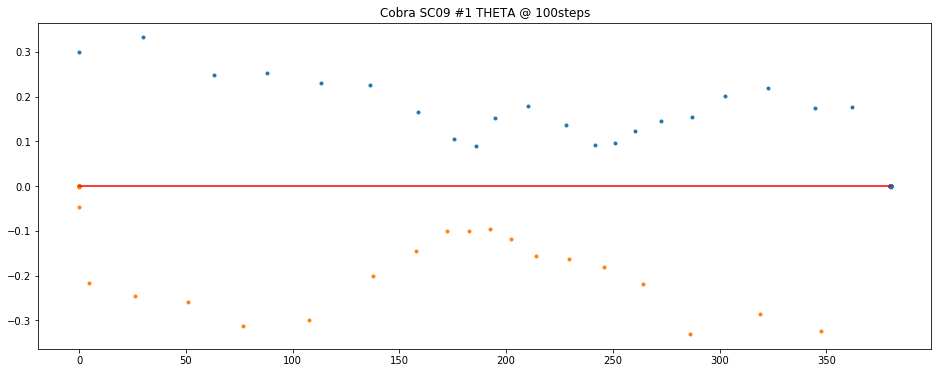

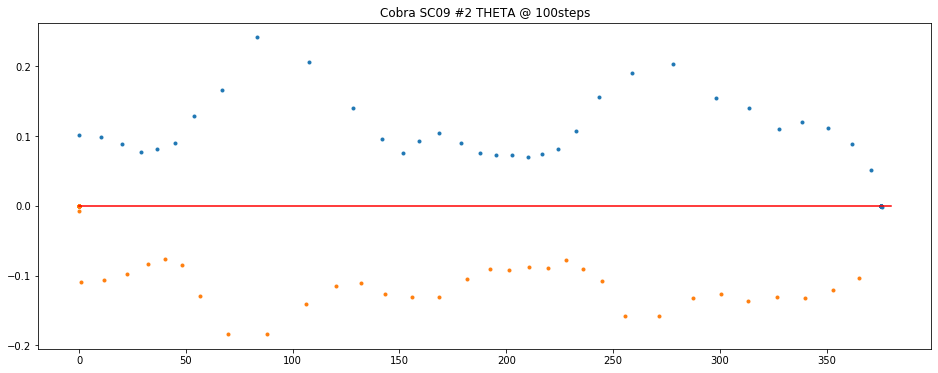

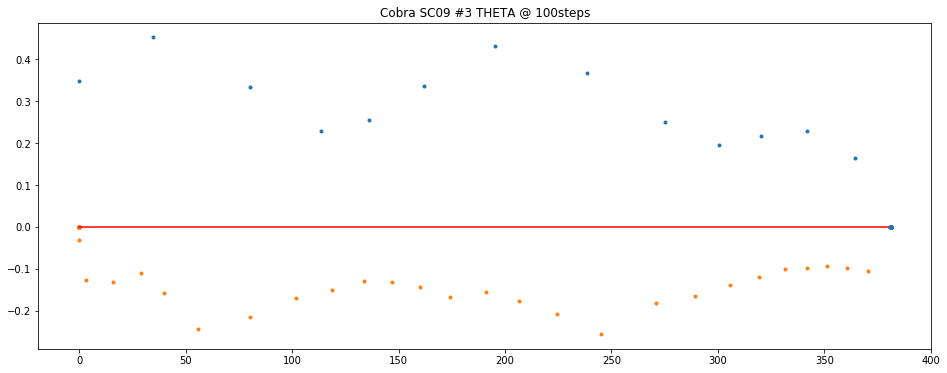

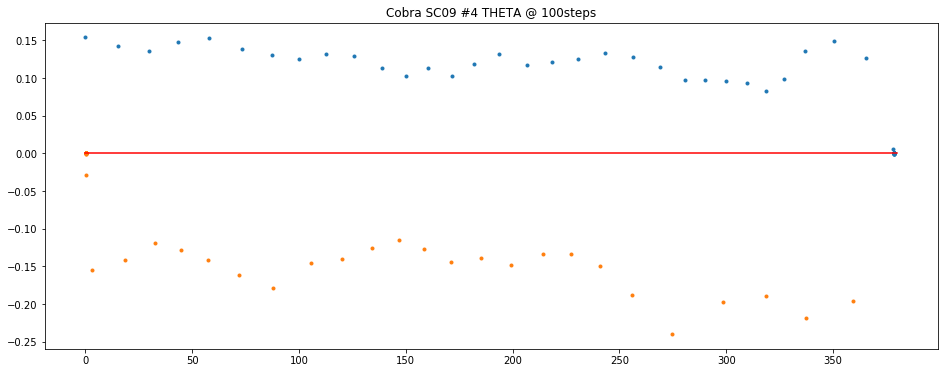

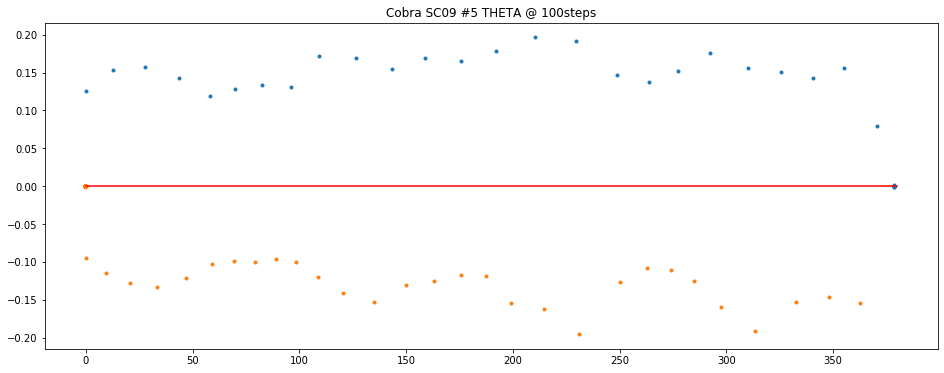

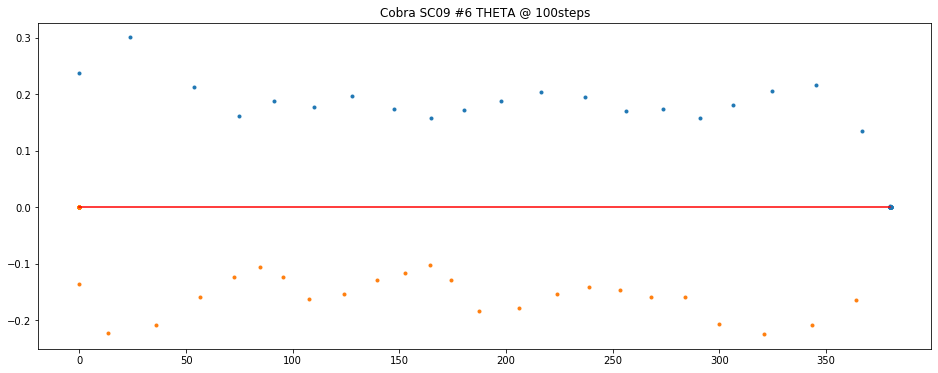

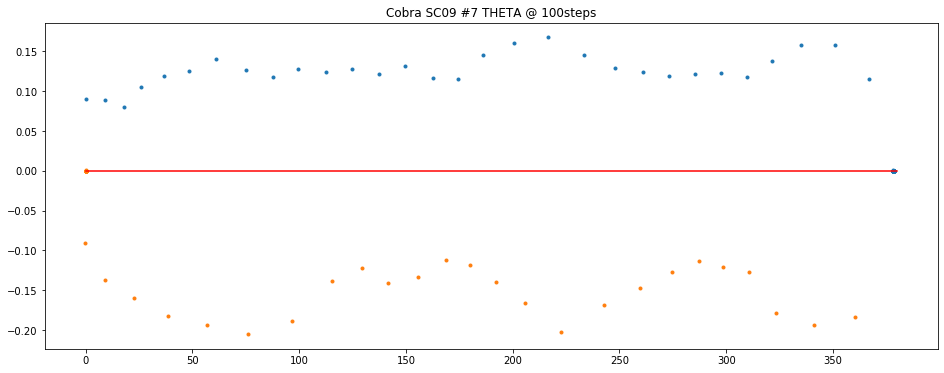

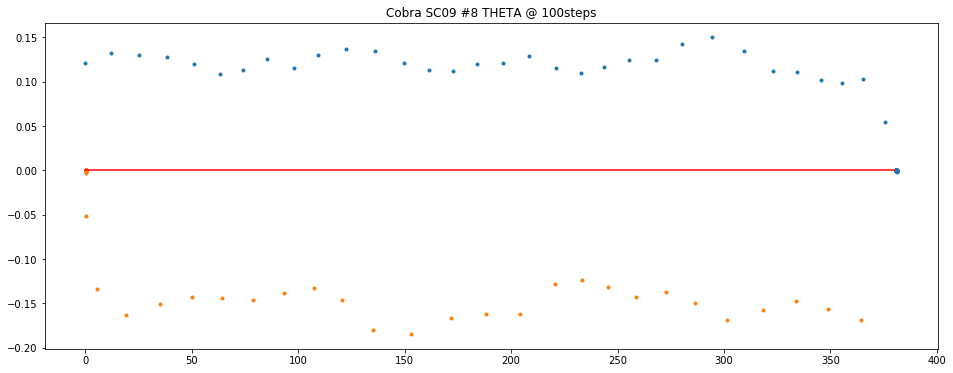

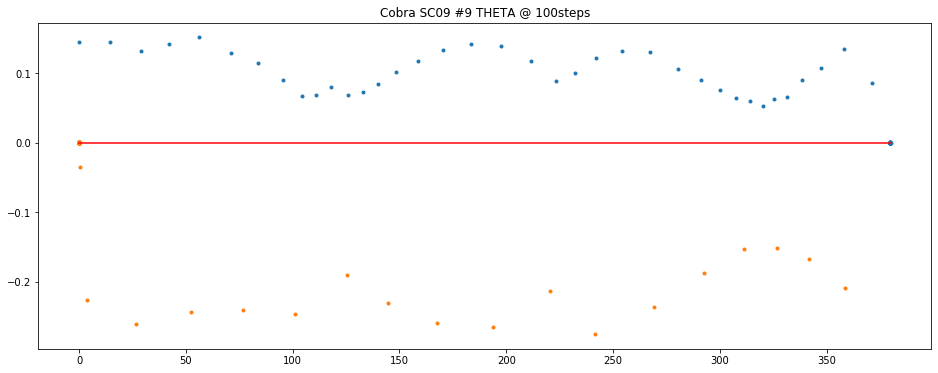

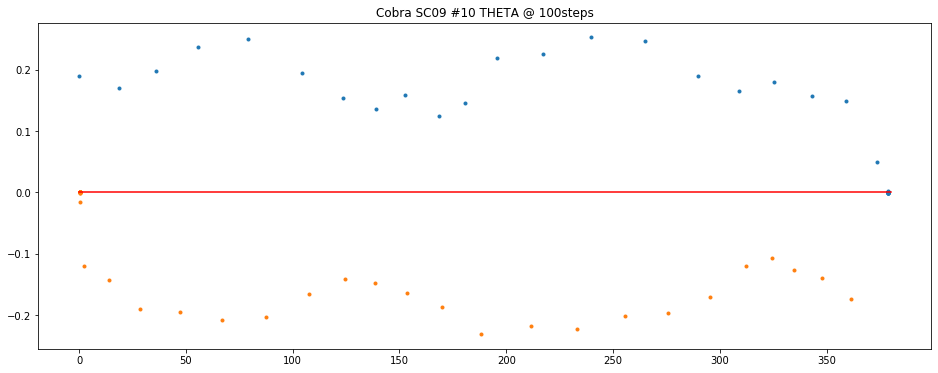

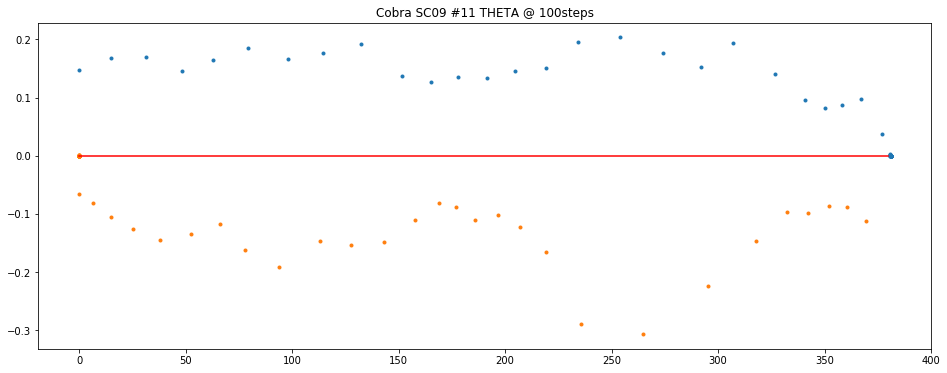

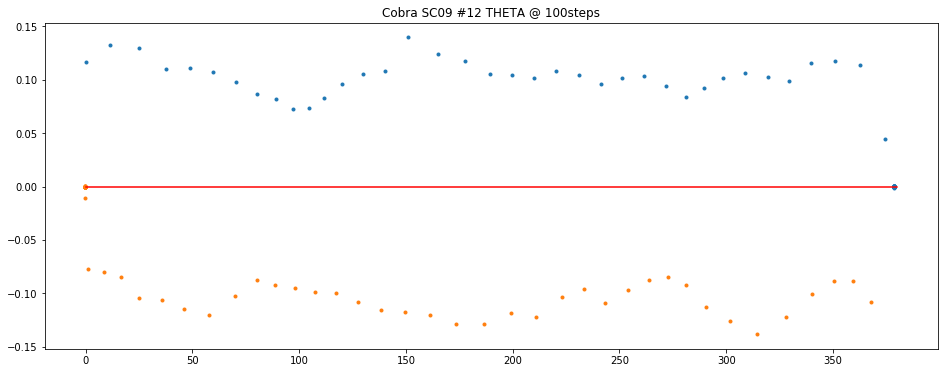

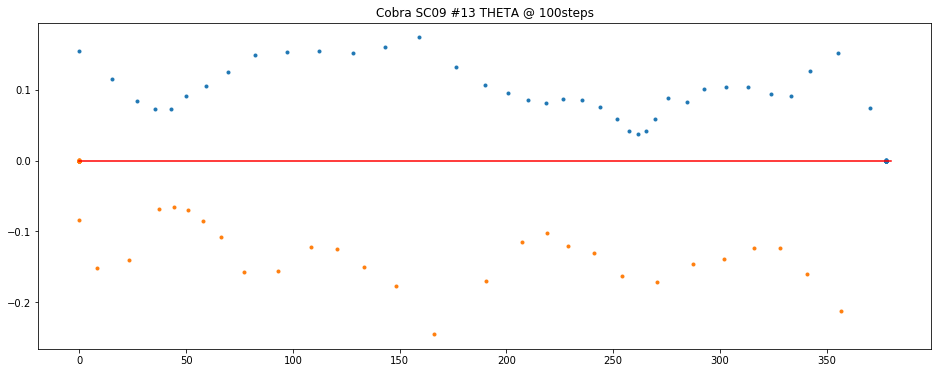

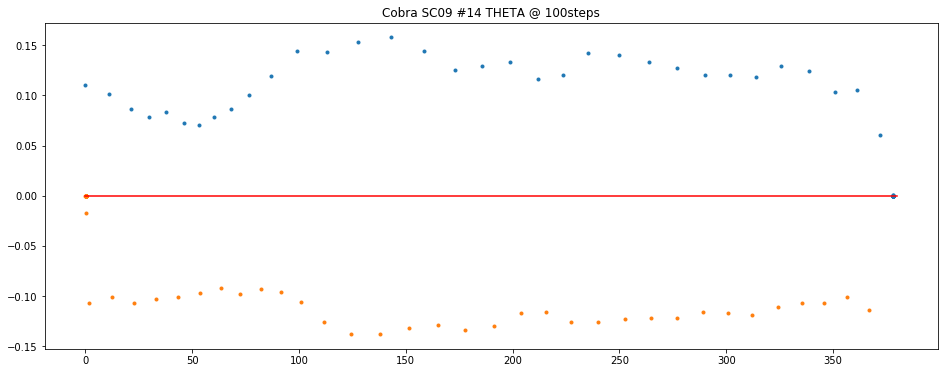

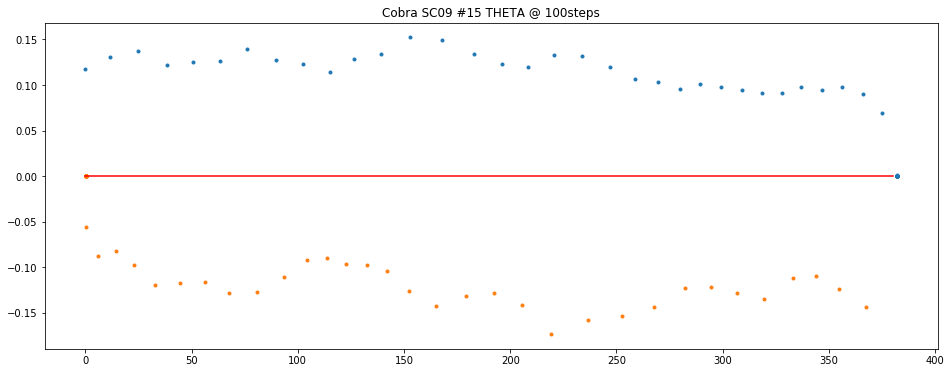

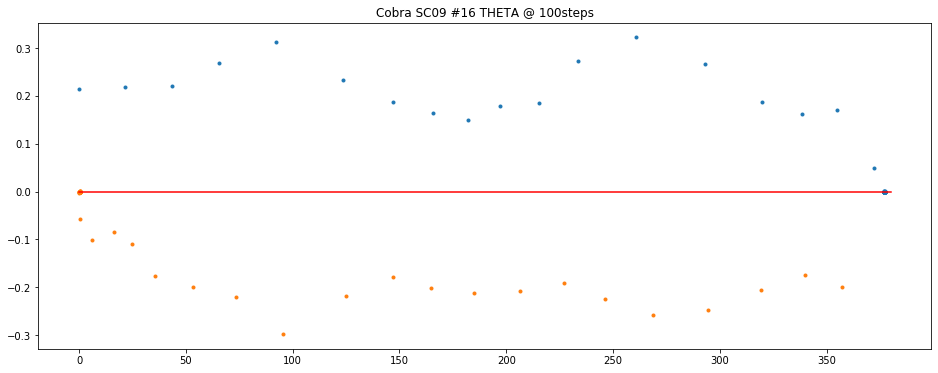

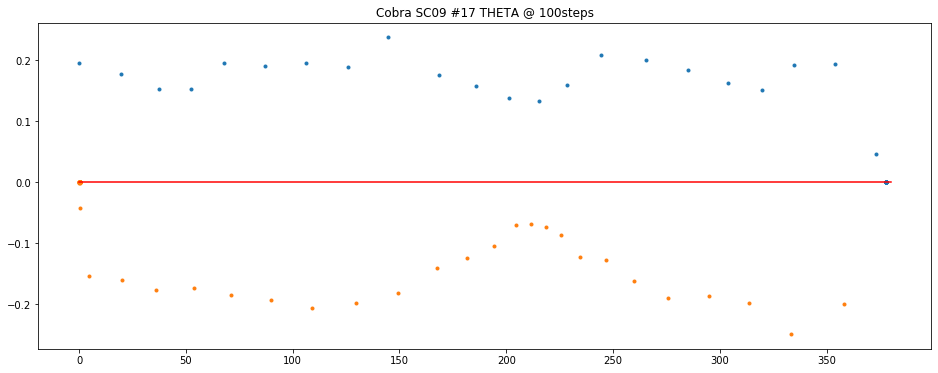

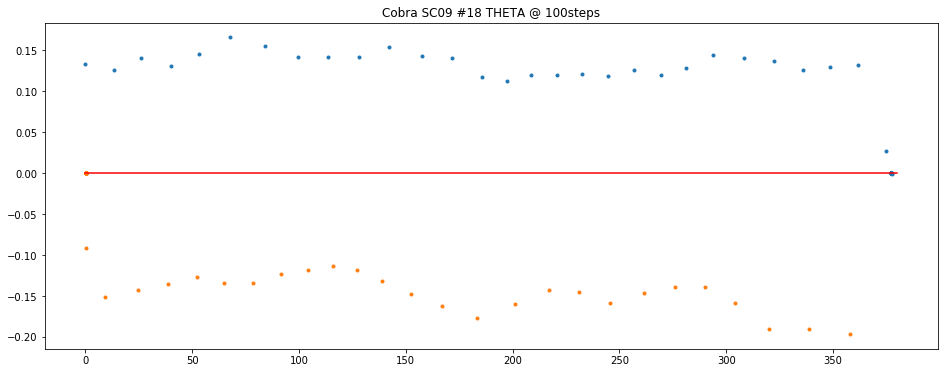

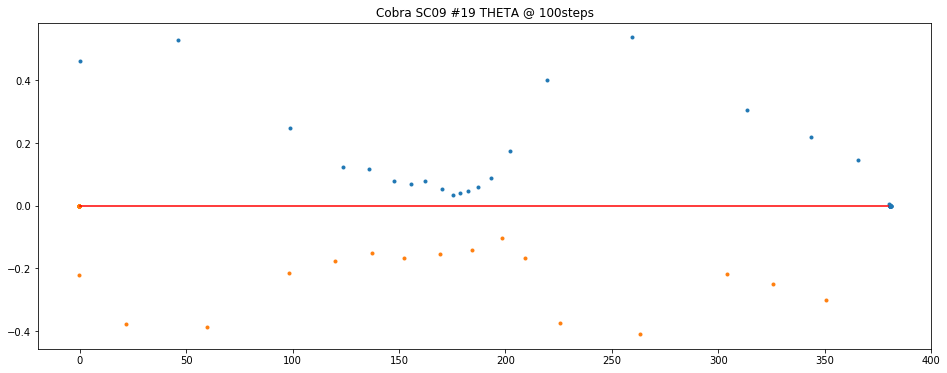

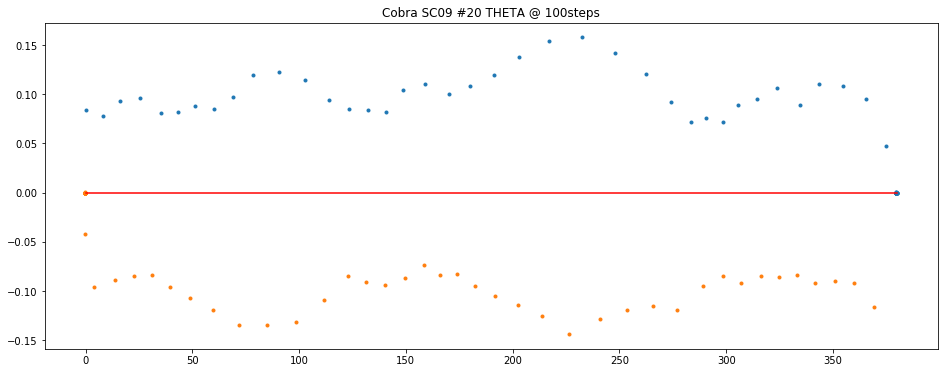

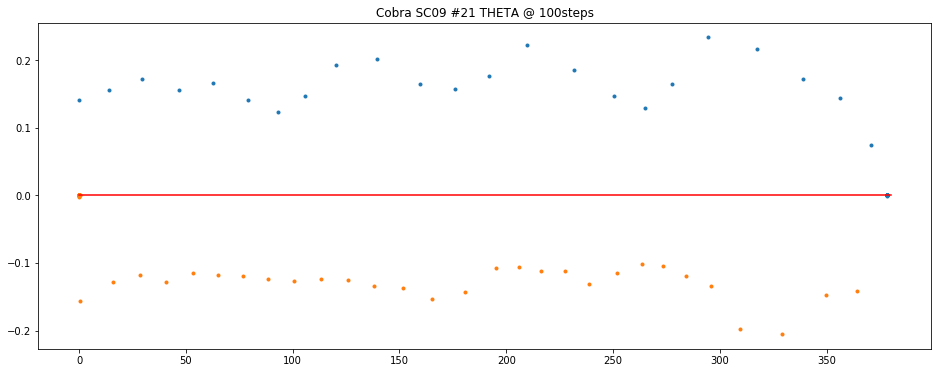

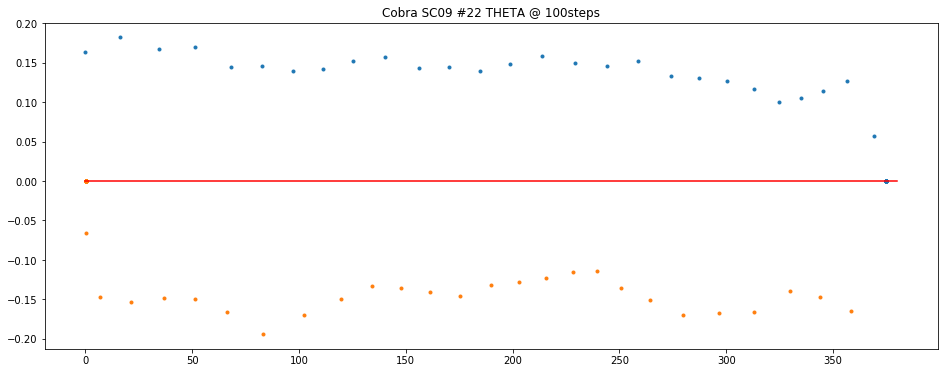

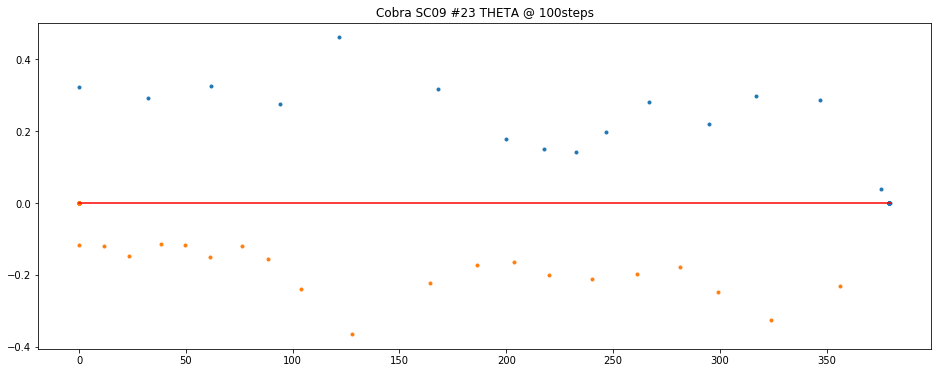

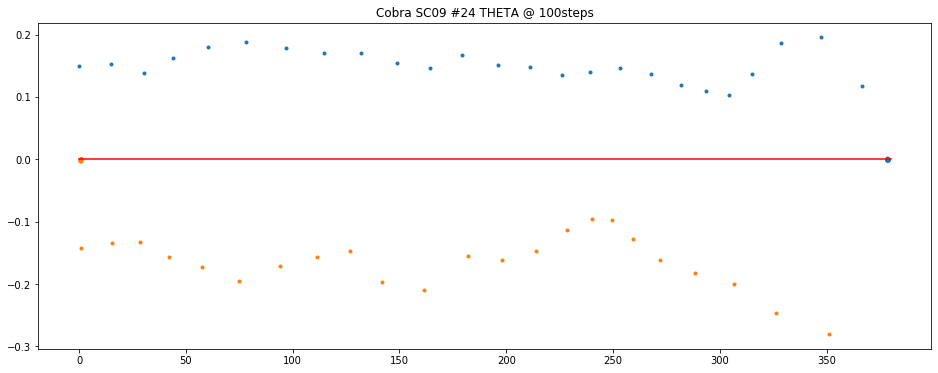

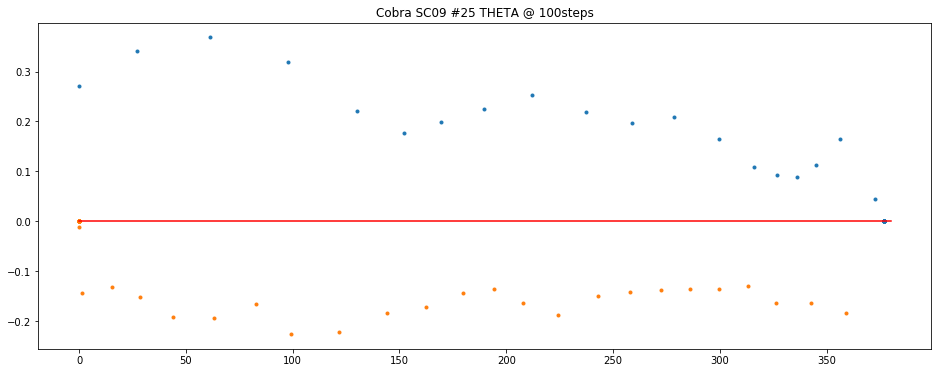

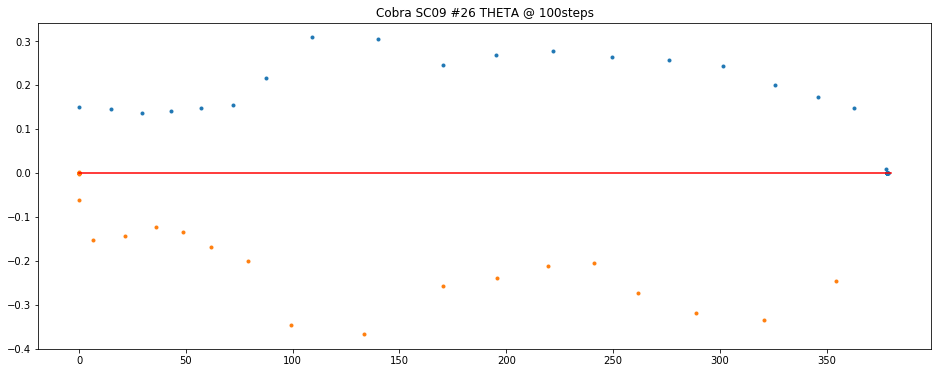

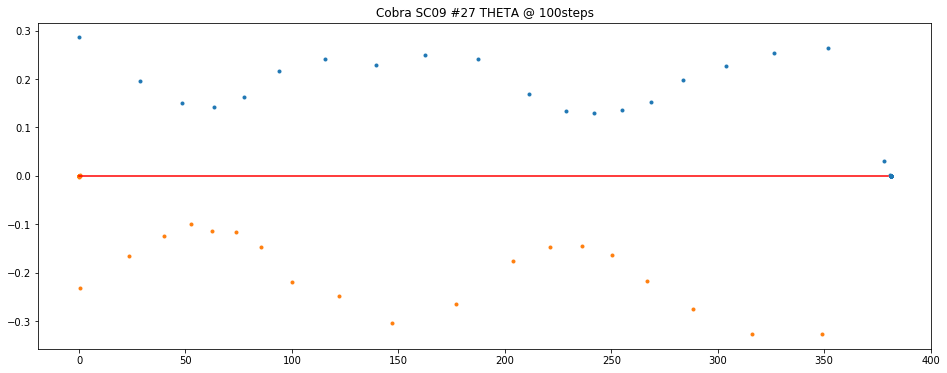

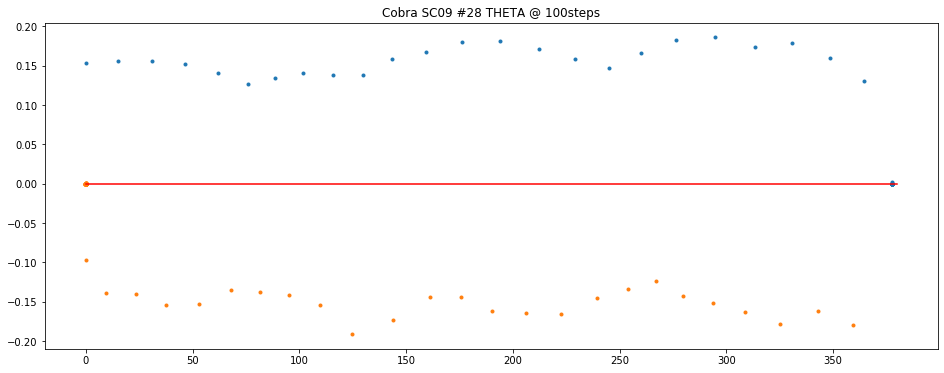

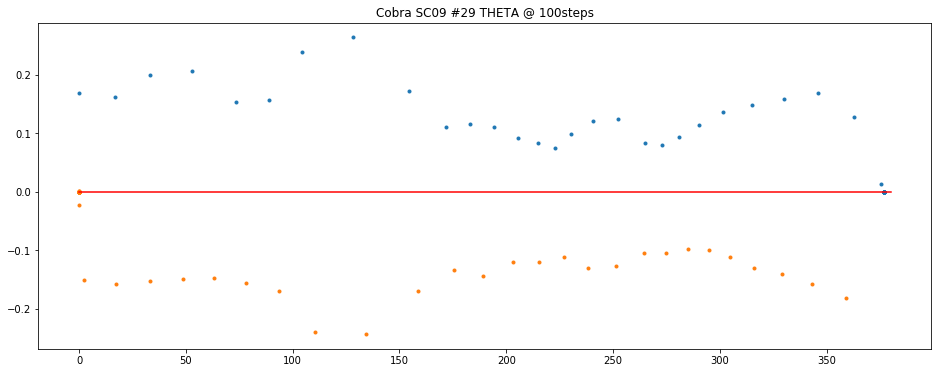

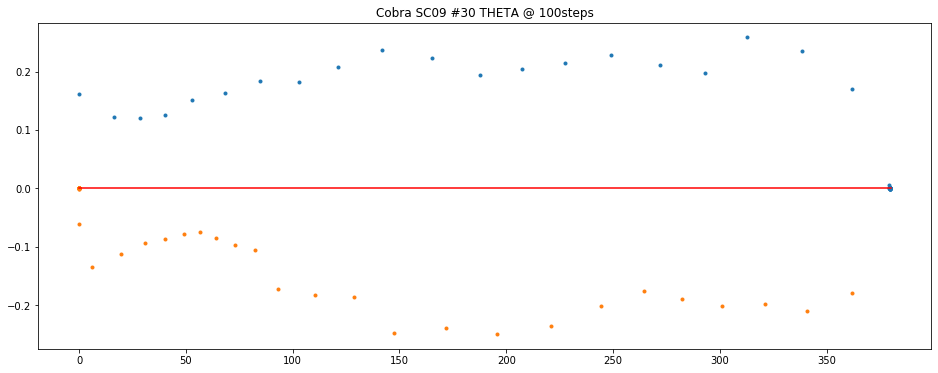

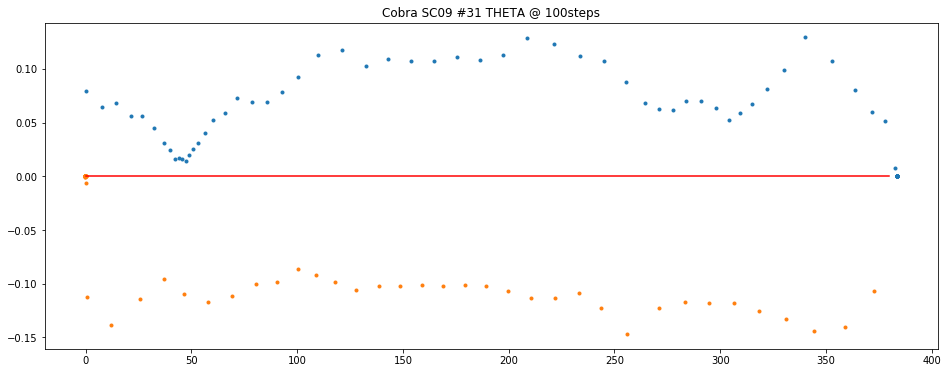

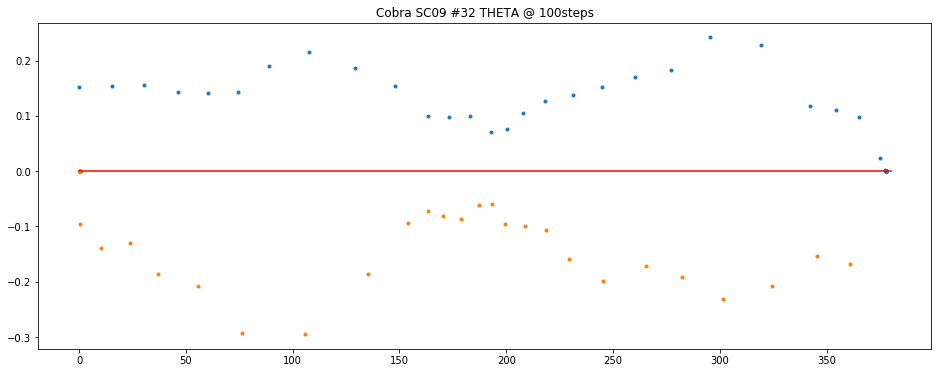

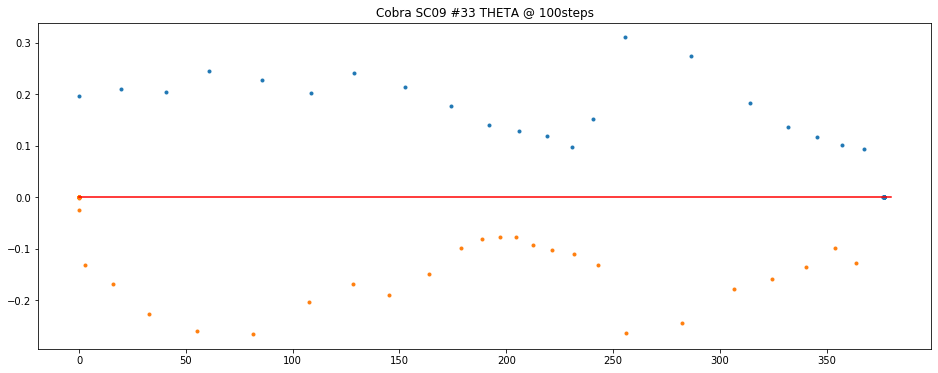

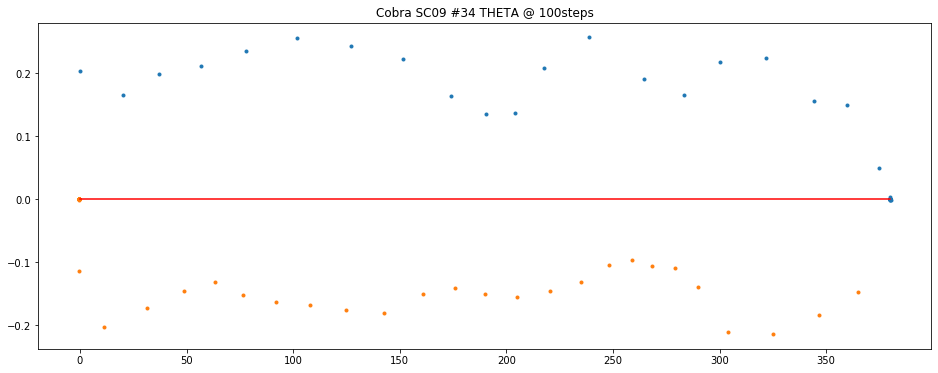

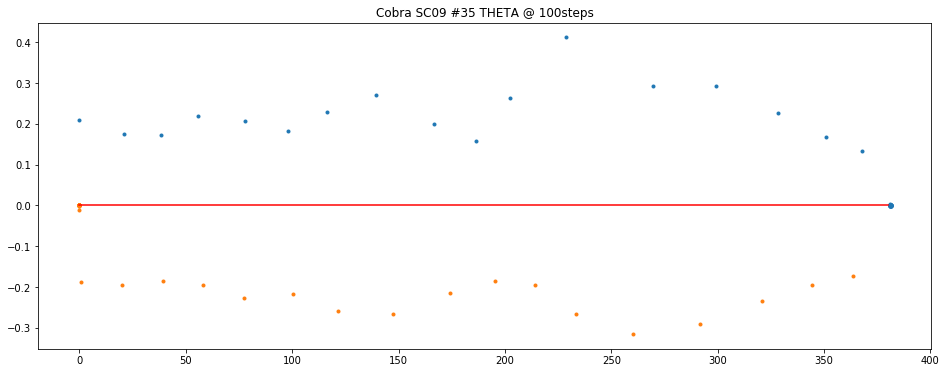

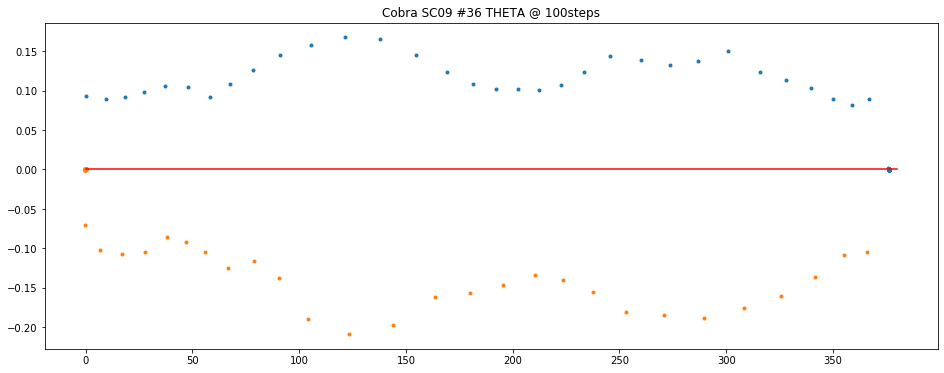

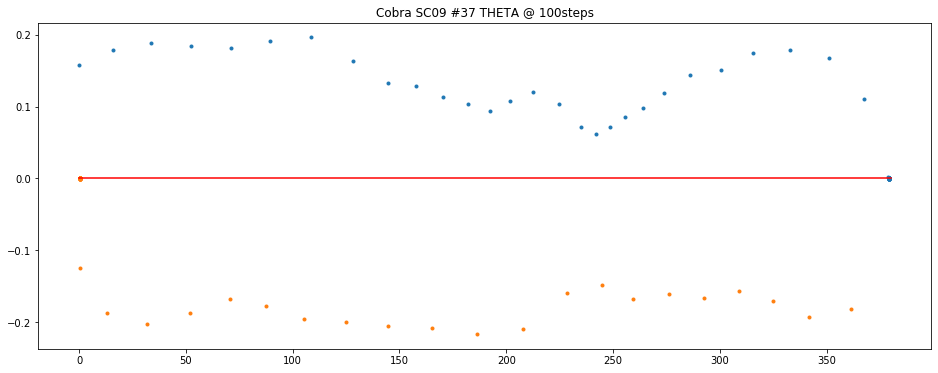

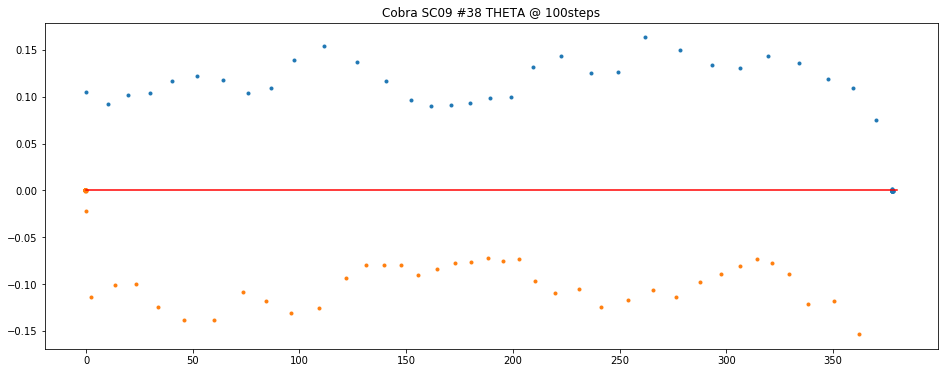

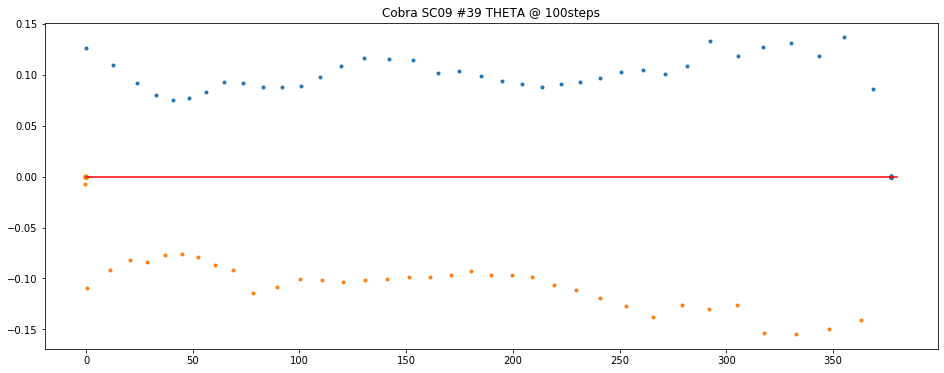

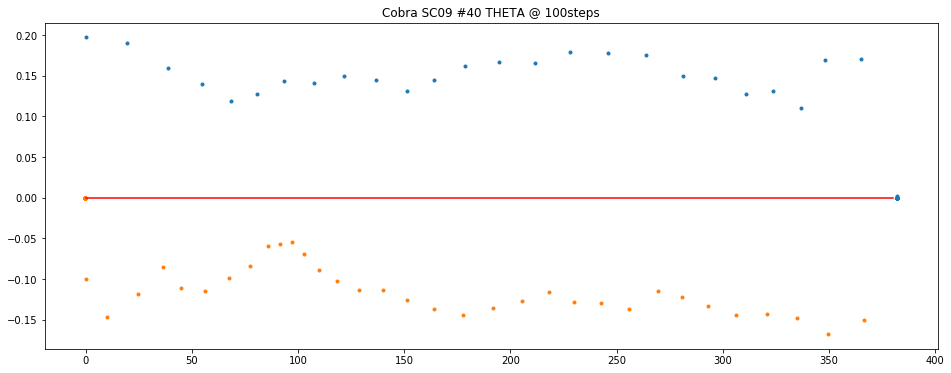

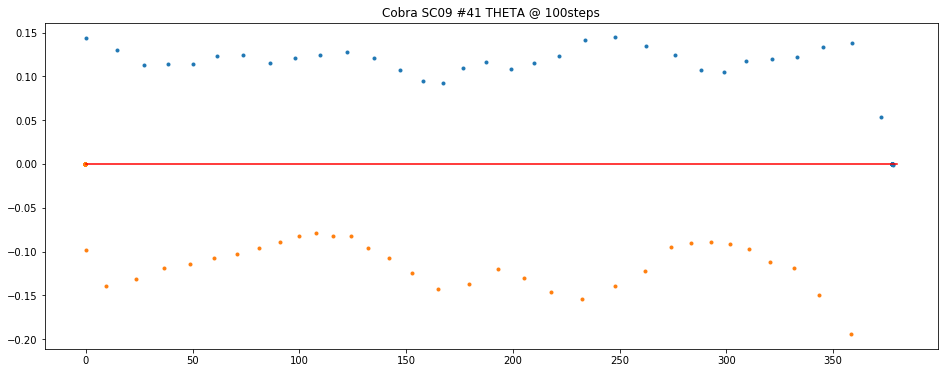

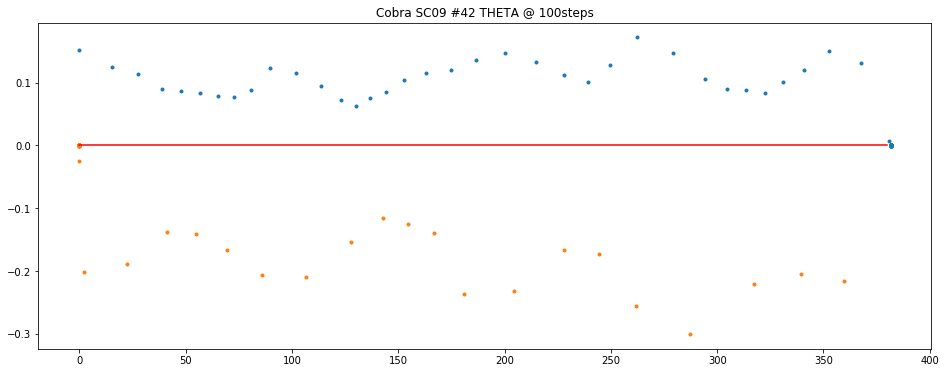

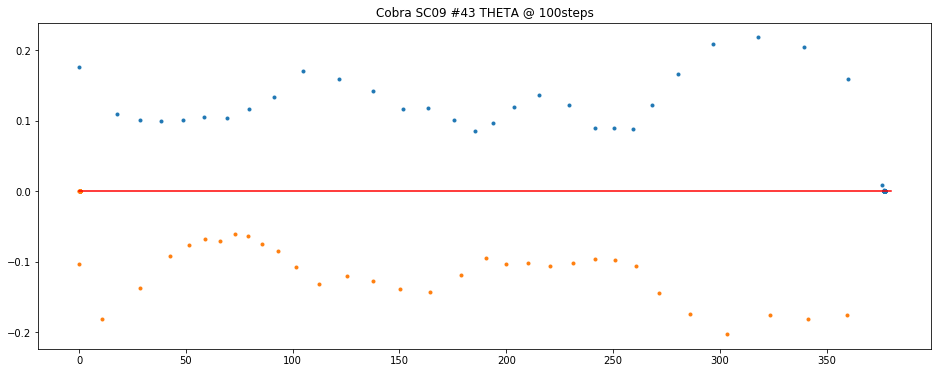

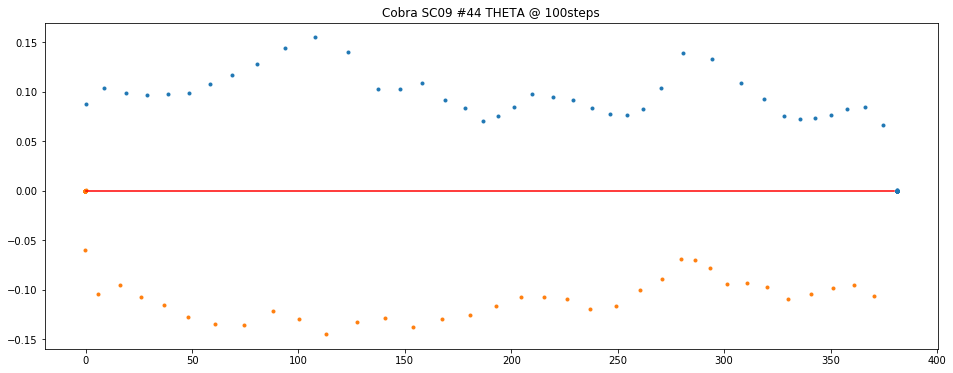

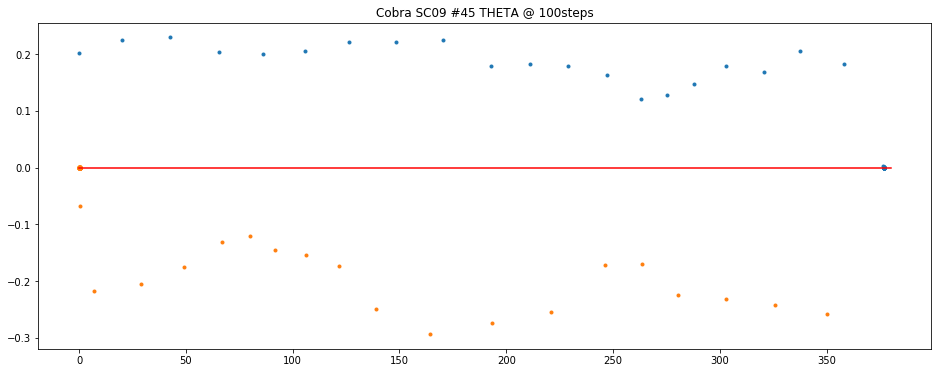

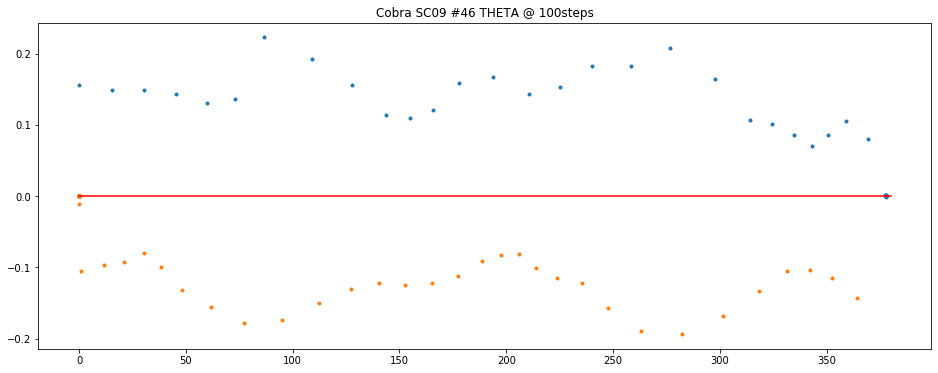

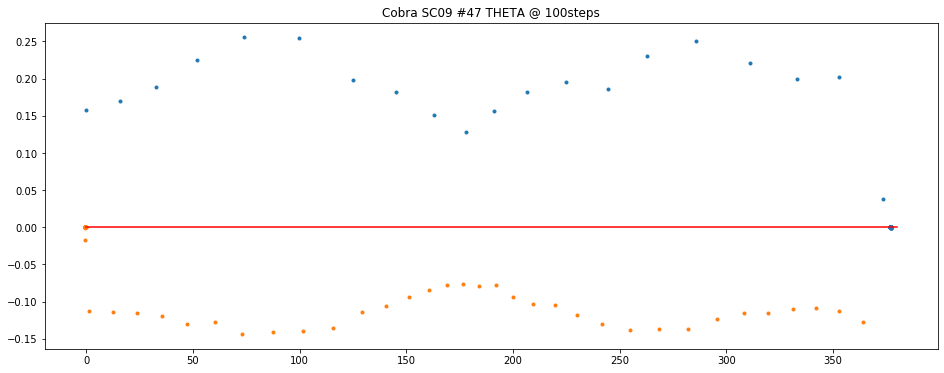

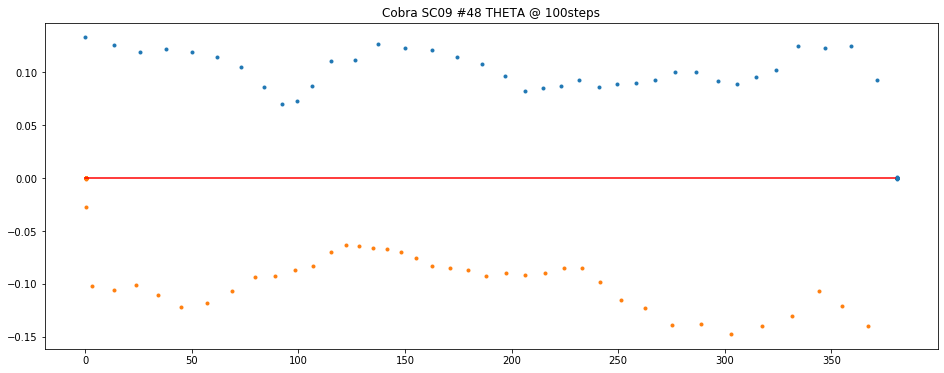

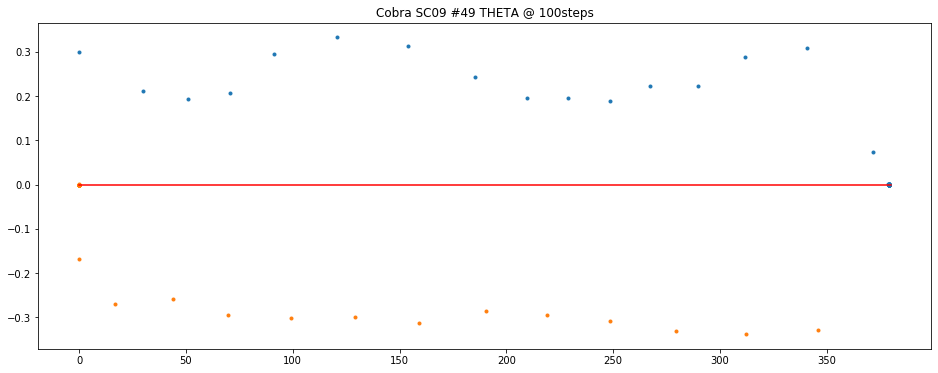

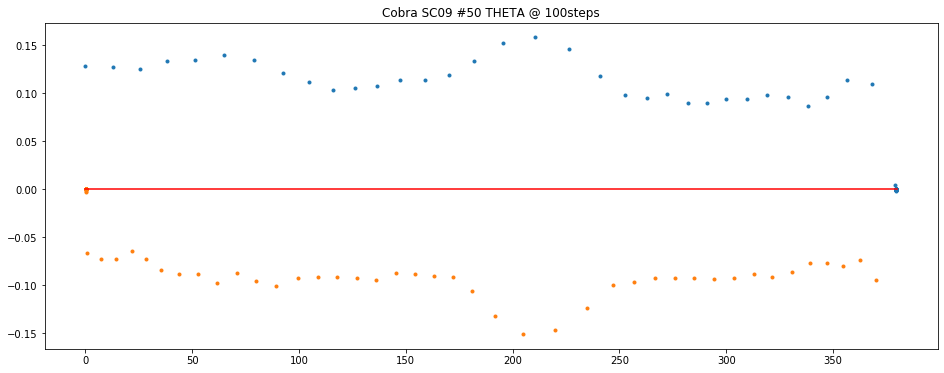

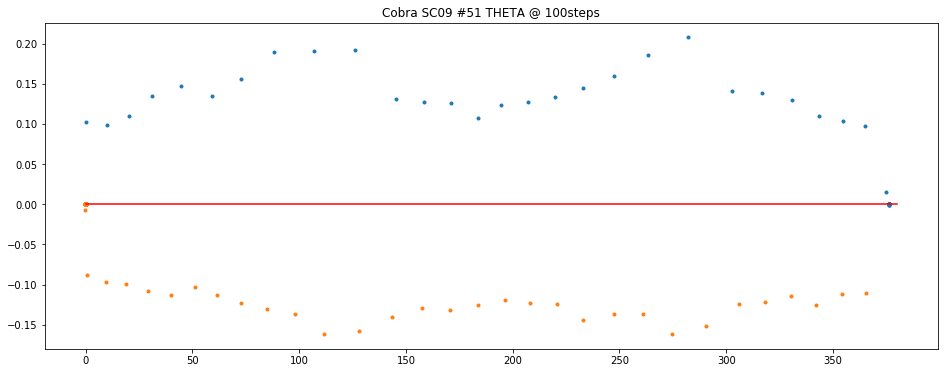

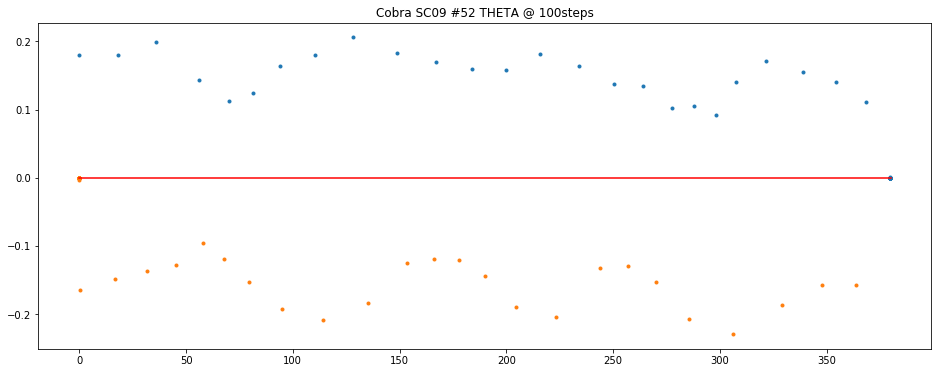

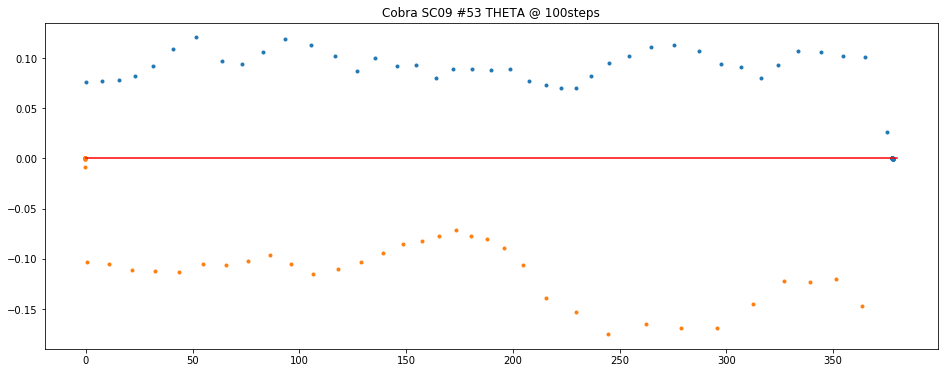

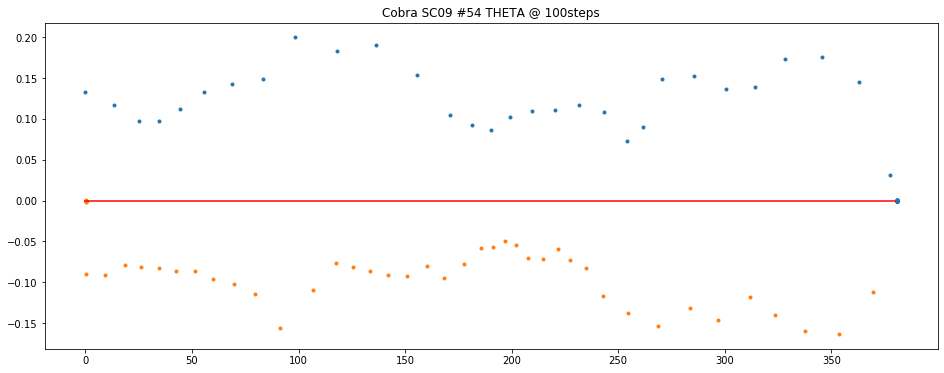

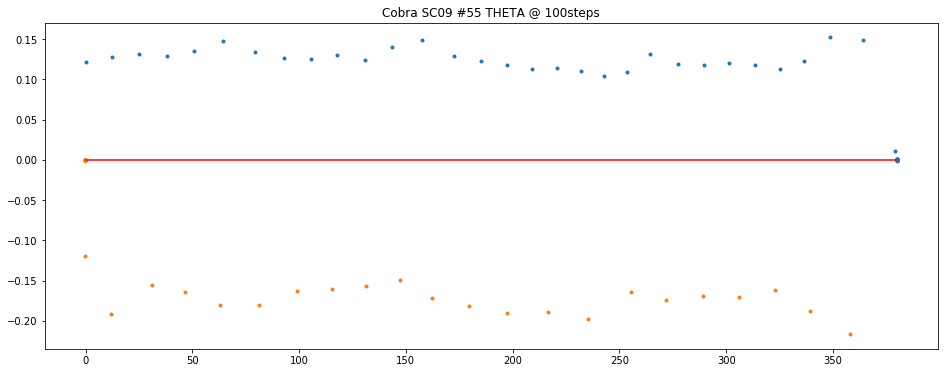

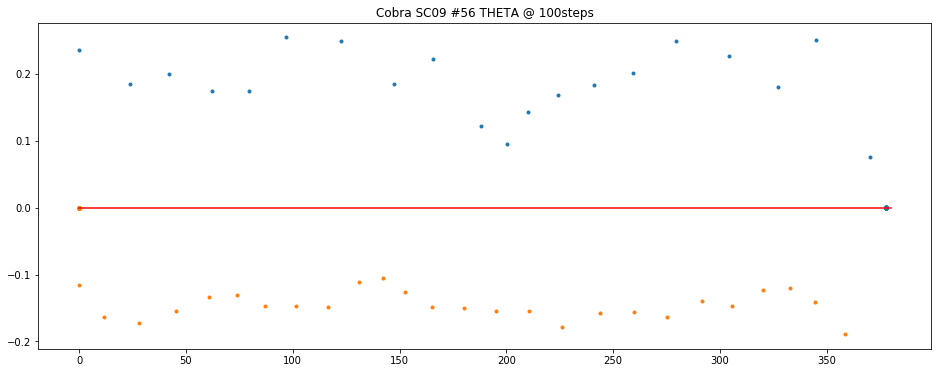

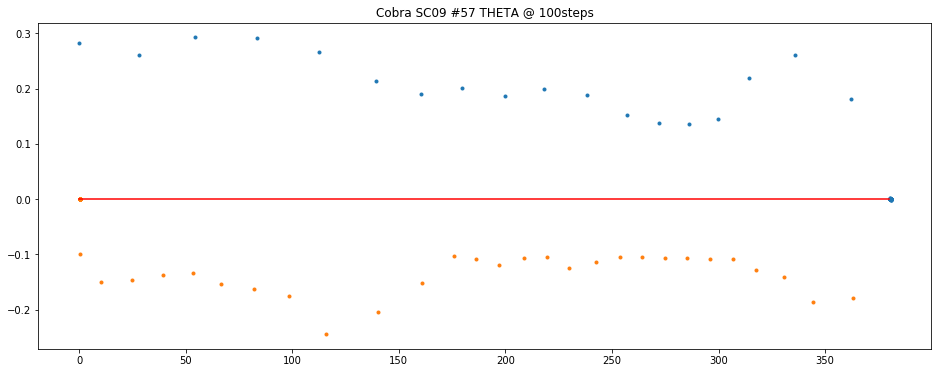

In [97]:
for c in range(57):
    fig = plt.figure(figsize=(16,6))
    ax = plt.gca()
    ax.set_title(f'Cobra {mod} #{c+1} THETA @ {steps}steps')
    for n in range(af.shape[1]):
        ax.plot(np.rad2deg(af[c,n,:-1]), np.rad2deg(af[c,n,1:]-af[c,n,:-1])/steps, '.')
        ax.plot(np.rad2deg(ar[c,n,1:]), np.rad2deg(ar[c,n,1:]-ar[c,n,:-1])/steps, '.')
        ax.plot([0,380], [0,0], 'r')
#    bottom, top = plt.ylim()
#    plt.ylim([max(-0.2,bottom), min(0.2,top)])
    plt.show()
    plt.close()

In [ ]:
for c in range(57):
#    plt.figure(3)
#    plt.clf()
    fig = plt.figure(figsize=(16,6))
    ax = plt.gca()
    ax.set_title(f'#{c}')
    for n in range(af.shape[1]):
        ax.plot(af[c, n], '.')
        ax.plot(ar[c, n], '.')
    plt.show()
    plt.close()

In [ ]:
plt.figure(4)
plt.clf()
ax = plt.gca()

ax.plot(np.rad2deg(sf), '.')
ax.plot(np.rad2deg(sr), 'x')
#ax.plot(sf2, '.')
#ax.plot(sr2, 'x')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,12))

#ax1 = plt.gca()
ax1.set_title('Phi 60, Run 1')
ax1.plot(np.rad2deg(sf), '.')
ax1.plot(np.rad2deg(sr), 'x')

#plt.figure(figsize=(12,8))
#ax = plt.gca()
ax2.set_title('Phi 60, Run 2')
ax2.plot(np.rad2deg(sf2), '.')
ax2.plot(np.rad2deg(sr2), 'x')

#plt.figure(figsize=(12,8))
#ax = plt.gca()
ax3.set_title('Phi 60, Run 1 - Run 2')
ax3.plot(np.rad2deg(sf-sf2), '.')
ax3.plot(np.rad2deg(sr-sr2), 'x')

with PdfPages(f'pdf/{mod}_theta_60.pdf') as pdf:
    pdf.savefig()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,12))

#ax1 = plt.gca()
ax1.set_title('Phi 180, Run 1')
ax1.plot(np.rad2deg(sf3), '.')
ax1.plot(np.rad2deg(sr3), 'x')

#plt.figure(figsize=(12,8))
#ax = plt.gca()
ax2.set_title('Phi 180, Run 2')
ax2.plot(np.rad2deg(sf4), '.')
ax2.plot(np.rad2deg(sr4), 'x')

#plt.figure(figsize=(12,8))
#ax = plt.gca()
ax3.set_title('Phi 180, Run 1 - Run 2')
ax3.plot(np.rad2deg(sf3-sf4), '.')
ax3.plot(np.rad2deg(sr3-sr4), 'x')

with PdfPages(f'pdf/{mod}_theta_180.pdf') as pdf:
    pdf.savefig()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,12))

sfa = (sf+sf2)/2
sra = (sr+sr2)/2

sfb = (sf3+sf4)/2
srb = (sr3+sr4)/2

#ax1 = plt.gca()
ax1.set_title('Phi 60, average')
ax1.plot(np.rad2deg(sfa), '.')
ax1.plot(np.rad2deg(sra), 'x')

#plt.figure(figsize=(12,8))
#ax = plt.gca()
ax2.set_title('Phi 180, average')
ax2.plot(np.rad2deg(sfb), '.')
ax2.plot(np.rad2deg(srb), 'x')

#plt.figure(figsize=(12,8))
#ax = plt.gca()
ax3.set_title('Phi 60 - Phi 180')
ax3.plot(np.rad2deg(sfa-sfb), '.')
ax3.plot(np.rad2deg(sra-srb), 'x')

with PdfPages(f'pdf/{mod}_theta_60-180.pdf') as pdf:
    pdf.savefig()

In [ ]:
paths = ['/data/MCS/20200506_016/data/','/data/MCS/20200506_017/data/','/data/MCS/20200506_018/data/','/data/MCS/20200506_019/data/','/data/MCS/20200506_020/data/','/data/MCS/20200506_021/data/','/data/MCS/20200506_022/data/','/data/MCS/20200508_001/data/']
n = len(paths)
sf = np.zeros((57,n))
sr = np.zeros((57,n))
steps = np.zeros(n, 'int')
ontime = np.zeros((57,2,n))

for m,path in enumerate(paths):
    sf[:,m] = np.load(path + 'thetaSpeedFW.npy')
    sr[:,m] = np.load(path + 'thetaSpeedRV.npy')
    steps[m] = int(np.load(path + 'steps.npy'))
    ontime[:,:,m] = np.load(path + 'ontime.npy').T

In [ ]:
nsf = np.zeros((57,n))
nsr = np.zeros((57,n))
med = np.zeros(n)

for c in range(57):
    nsf[c] = sf[c] / sf[c,0]
    nsr[c] = sr[c] / sr[c,0]

for m in range(n):
    med[m] = np.median([nsf[:,m], nsr[:,m]])

In [ ]:
with PdfPages(f'pdf/{mod}_theta_speed.pdf') as pdf:
    fig = plt.figure(figsize=(16,6))
    plt.ylim([0,2])
    plt.xticks(np.arange(n), steps)
    for c in range(57):
    #c = 10
        plt.plot(sf[c]/sf[c,0], '.')
        plt.plot(sr[c]/sr[c,0], '.')
    pdf.savefig()
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(16,6))
    plt.xticks(np.arange(n), steps)
    plt.plot(med, 'x')
    pdf.savefig()
    plt.show()
    plt.close()

In [ ]:
bad, badR

In [ ]:
c = 17

plt.figure(5)
plt.clf()

#plt.subplot(211)
ax = plt.gca()
ax.set_title(f'#{c} FW')
ax.plot(np.rad2deg(mf[c]), 'r')


#plt.subplot(212)
ax = plt.gca()
ax.set_title(f'#{c} RV')
ax.plot(np.rad2deg(mr[c]), 'b')

In [ ]:
c = 30

plt.figure(5)
plt.clf()

#plt.subplot(211)
ax = plt.gca()
ax.set_title(f'#{c} FW')
ax.plot(mf2[c], 'r')


#plt.subplot(212)
ax = plt.gca()
ax.set_title(f'#{c} RV')
ax.plot(mr2[c], 'b')

In [ ]:
from ics.cobraCharmer import pfiDesign
import pathlib

In [ ]:
#xml = pathlib.Path('/home/pfs/Documents/cwen/ics_cobraCharmer/xml/SC04_03.xml')
xml = pathlib.Path('/data/MCS/20200110_003/output/SC34_theta_400.xml')
model = pfiDesign.PFIDesign(xml)

In [ ]:
model.motorOntimeSlowFwd1, model.motorOntimeSlowRev1

In [ ]:
(model.tht1-model.tht0) % (np.pi*2), np.rad2deg((model.tht1-model.tht0) % (np.pi*2)), np.rad2deg(6.2)

In [ ]:
np.rad2deg(model.tht0[45:48]), np.rad2deg(model.tht1[45:48])

In [ ]:
tf = model.motorOntimeSlowFwd1.copy()
tr = model.motorOntimeSlowRev1.copy()

In [ ]:
np.where(tf>0.07), np.where(tr>0.07)

In [ ]:
tf, tr

In [ ]:
spd_adj = np.deg2rad(0.075)
tf /= 1+(sf/spd_adj-1)/3
tr /= 1+(sr/spd_adj-1)/3

In [ ]:
tf, tr

In [ ]:
tf[31] = 0.06
tr[36] = 0.05

In [ ]:
np.where(np.rad2deg(sf) < 0.05)

In [ ]:
tr[41] = 0.06
tr[56] = 0.05

In [ ]:
tr[np.rad2deg(sr) < 0.05] *= 1.2

In [ ]:
tf[10] = 0.05

In [ ]:
tf, tr

In [ ]:
tr[41], tr[56]

In [ ]:
model.motorOntimeSlowFwd1[17], model.motorOntimeSlowRev1[17]

In [ ]:
model.updateOntimes(thetaFwd=tf, thetaRev=tr, fast=False)

In [ ]:
model.createCalibrationFile('/home/pfs/Documents/cwen/ics_cobraCharmer/xml/SC34_02.xml')

In [ ]:
tf[13], tr[13]

In [ ]:
tf[5] = 0.04
tr[5] = 0.04
tf[30] = 0.035

In [ ]:
fw[19], rv[19]

In [ ]:
tr[13] = 0.045

In [ ]:
ar[1,0]

In [ ]:
np.argmin(abs(ar[1,0]%(np.pi*2) - np.pi))

In [ ]:
fw[30], rv[30]

In [ ]:
fw[43], rv[43], centers[43]

In [ ]:
data = np.concatenate((fw[33].flatten(), rv[33].flatten()))

In [ ]:
np.max(np.real(data)), np.min(np.real(data)), np.max(np.imag(data)), np.min(np.imag(data))

In [ ]:
centers[33]

In [ ]:
data = rv[33, 1].flatten()
plt.plot(np.real(data), np.imag(data), '.')

In [ ]:
model.centers, centers, model.centers - centers

In [ ]:
path = '/data/MCS/20191230_003/data/'
data = np.load(path + 'thetaData.npy')

In [ ]:
angles = np.linspace(15,345,34)
print(np.where(abs(np.rad2deg(data[goodIdx,:,7,0])-angles)>0.2))
print(np.where(abs(np.rad2deg(data[goodIdx,:,7,0])-angles)>0.1))
print(np.where(abs(np.rad2deg(data[goodIdx,:,7,0])-angles)>0.1)[0].shape[0])
print(np.amax(abs(np.rad2deg(data[goodIdx,:,:,0])-angles[:,np.newaxis]), axis=(0,1)))
np.average(abs(np.rad2deg(data[goodIdx,:,:,0])-angles[:,np.newaxis]), axis=(0,1))

In [ ]:
c = 12

plt.figure(4)
plt.clf()
for n in range(data.shape[1]):
    plt.plot(np.rad2deg(data[c,n,:,0]))

In [ ]:
#bad = [37]
#useable= [e for e in range(1,58) if e not in bad]
#idx = np.array(useable) - 1
idx = goodIdx

for run in range(8):
#    plt.figure()
    d = (np.rad2deg(data[idx,:,:,0])-angles[:,np.newaxis])[:,:,run]

    plt.subplot(121)
#    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Diff angles #{run+1}')
#    plt.grid(True)
    plt.hist(d.flatten(), bins='auto')

    plt.subplot(122)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Absolute diffs #{run+1}')
    plt.grid(True)
    plt.hist(abs(d).flatten(), bins='auto')

    plt.gca().yaxis.set_minor_formatter(NullFormatter())
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.35)
    with PdfPages(f'pdf/SC31_theta_80_{run+1}.pdf') as pdf:
        pdf.savefig()
    plt.show()

In [100]:
datadir = '/data/MCS/20200821_021'
angles = np.load(f'{datadir}/data/angles.npy')
ontimes = np.load(f'{datadir}/data/ontimes.npy')
speeds = np.load(f'{datadir}/data/speeds.npy')
goodIdx = np.load(f'{datadir}/data/cobras.npy')
parameters = np.load(f'{datadir}/data/parameters.npy')

In [102]:
with PdfPages(f'pdf/{mod}_theta_scan5.pdf') as pdf:
    for idx in range(len(ontimes)):
        fig = plt.figure(figsize=(20,30))
        ax1 = plt.subplot(411)
        ax1.set_title(f'Cobra #{goodIdx[idx]+1}: On-time (theta, Forward)')
        ax2 = plt.subplot(412)
        ax2.set_title(f'Cobra #{goodIdx[idx]+1}: Step size (theta, Forward)')
        ax3 = plt.subplot(413)
        ax3.set_title(f'Cobra #{goodIdx[idx]+1}: On-time (theta, Backward)')
        ax4 = plt.subplot(414)
        ax4.set_title(f'Cobra #{goodIdx[idx]+1}: Step size (theta, Backward)')

        for repeat in range(ontimes.shape[1]):
            data = ontimes[idx,repeat,0]*1000
            nz = np.where(data == 0)[0]
            if len(nz) > 0:
                upper = np.where(data == 0)[0][0] - 1
            else:
                upper = len(data)
            xdata = np.rad2deg(angles)[idx,repeat,0,:upper]
            data1 = np.rad2deg(speeds[idx,repeat,0])
            ax1.plot(xdata, data[:upper], '.', label=f'{repeat+1}')
            ax2.plot(xdata, data1[:upper], '.', label=f'{repeat+1}')

            data = ontimes[idx,repeat,1]*1000
            nz = np.where(data == 0)[0]
            if len(nz) > 0:
                upper = np.where(data == 0)[0][0]
            else:
                upper = len(data)
            xdata = np.rad2deg(angles)[idx,repeat,1,:upper]
            data1 = -np.rad2deg(speeds[idx,repeat,1])
            ax3.plot(xdata, data[:upper], '.', label=f'{repeat+1}')
            ax4.plot(xdata, data1[:upper], '.', label=f'{repeat+1}')

        ax1.legend()
        ax2.legend()
        ax3.legend()
        ax4.legend()
        pdf.savefig(fig)
        plt.close()

In [101]:
def smooth(x, window_len=21, window='hamming'):
    s = np.r_[x[window_len-1:0:-1], x, x[-2:-window_len-1:-1]]
    w = eval('np.' + window + '(window_len)')
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[(window_len//2):-(window_len//2)]

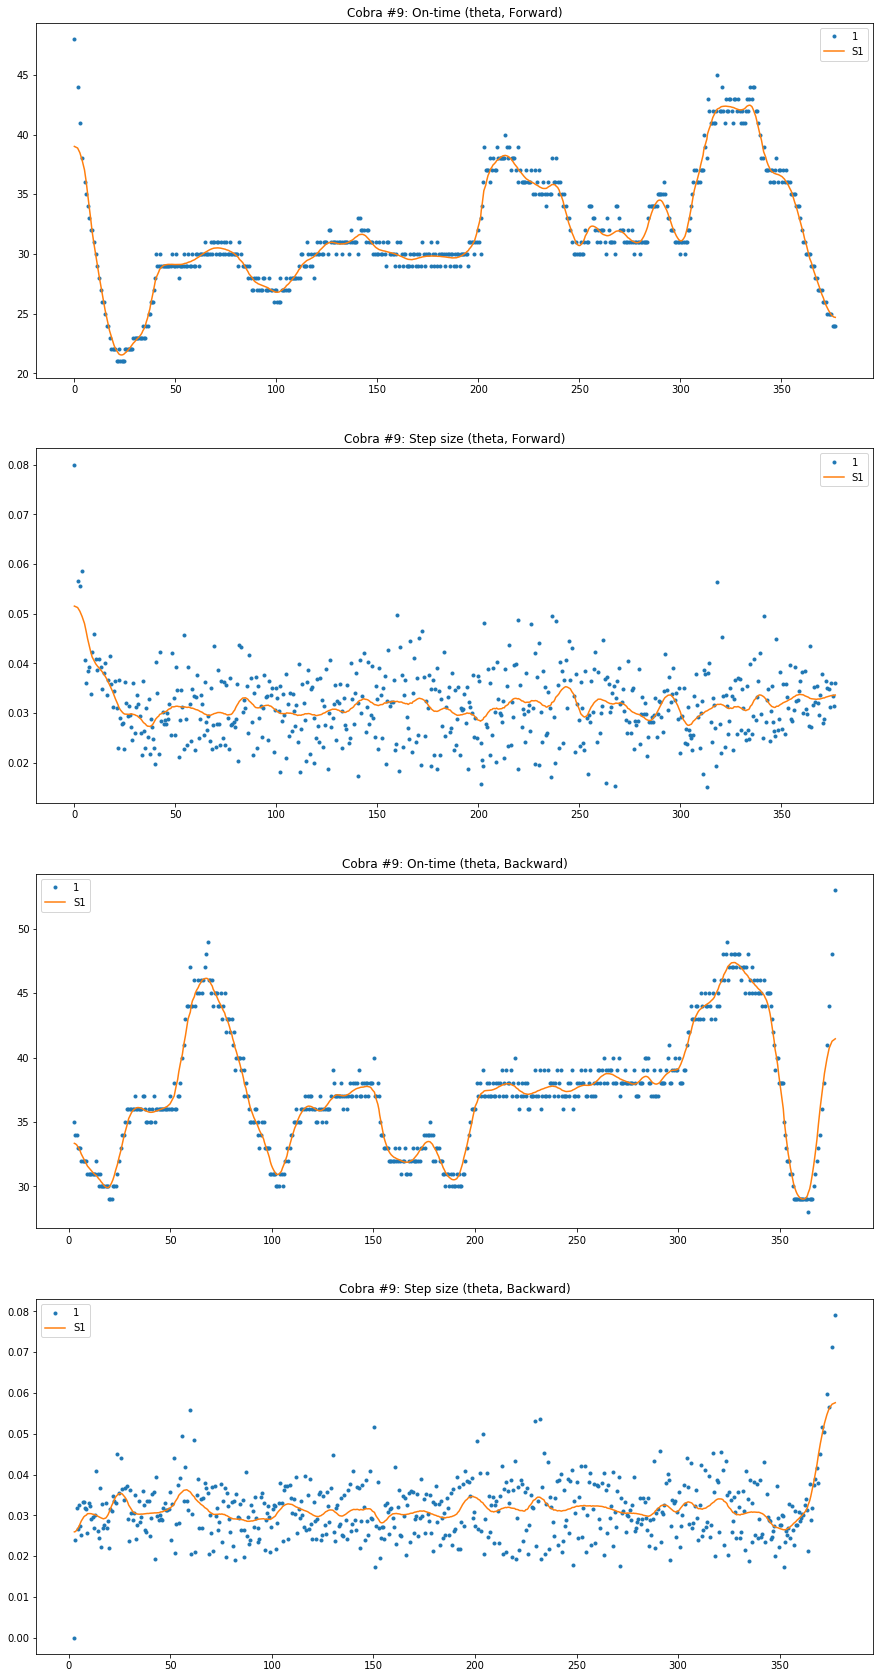

In [103]:
idx = 8

plt.figure(figsize=(15,30))
ax1 = plt.subplot(411)
ax1.set_title(f'Cobra #{goodIdx[idx]+1}: On-time (theta, Forward)')
ax2 = plt.subplot(412)
ax2.set_title(f'Cobra #{goodIdx[idx]+1}: Step size (theta, Forward)')
ax3 = plt.subplot(413)
ax3.set_title(f'Cobra #{goodIdx[idx]+1}: On-time (theta, Backward)')
ax4 = plt.subplot(414)
ax4.set_title(f'Cobra #{goodIdx[idx]+1}: Step size (theta, Backward)')

#for repeat in range(ontimes.shape[1]):
for repeat in range(1):
    data = ontimes[idx,repeat,0]*1000
    nz = np.where(data == 0)[0]
    if len(nz) > 0:
        upper = nz[0] - 1
    else:
        upper = len(data)
    xdata = np.rad2deg(angles)[idx,repeat,0,:upper]
    data1 = np.rad2deg(speeds[idx,repeat,0])
    ax1.plot(xdata, data[:upper], '.', label=f'{repeat+1}')
    ax1.plot(xdata, smooth(data[:upper]), label=f'S{repeat+1}')
    ax2.plot(xdata, data1[:upper], '.', label=f'{repeat+1}')
    ax2.plot(xdata, smooth(data1[:upper]), label=f'S{repeat+1}')

    data = ontimes[idx,repeat,1]*1000
    nz = np.where(data == 0)[0]
    if len(nz) > 0:
        upper = nz[0]
    else:
        upper = len(data)
    xdata = np.rad2deg(angles)[idx,repeat,1,:upper]
    data1 = -np.rad2deg(speeds[idx,repeat,1])
    ax3.plot(xdata, data[:upper], '.', label=f'{repeat+1}')
    ax3.plot(xdata, smooth(data[:upper]), label=f'S{repeat+1}')
    ax4.plot(xdata, data1[:upper], '.', label=f'{repeat+1}')
    ax4.plot(xdata, smooth(data1[:upper]), label=f'S{repeat+1}')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

In [ ]:
np.where(np.rad2deg(data[:,:,:,0])>600)

In [ ]:
np.rad2deg(data[45,25,:,0]), data[45,25,:,1]+data[45,25,:,2]*(1j), data[45,25,:,3]

In [ ]:
c = 45
r = 25
plt.plot(data[c,r,:,1], data[c,r,:,2], 'o')
plt.plot(np.real(centers[c]), np.imag(centers[c]), 'x')
plt.gca().set_aspect('equal')

In [ ]:
centers[45]

In [ ]:
np.rad2deg(af[48]), np.rad2deg(ar[48]), af[48], ar[48]

In [ ]:
np.rad2deg(af[48]), np.rad2deg(ar[48])

In [ ]:
fw[3][:,0], rv[3][:,0]

In [ ]:
badM, badR

In [ ]:
angles.shape

In [ ]:
w_len = 9
x = ontimes[0,2,0,:671]
s = np.r_[x[w_len-1:0:-1], x, x[-2:-w_len-1:-1]]
w = np.hamming(w_len)
y = np.convolve(w/w.sum(), s, mode='valid')[(w_len//2):-(w_len//2)]

In [ ]:
smooth(x, window='hanning')

In [ ]:
angles.shape, speeds.shape, ontimes.shape

In [104]:
mmDtype = np.dtype(dict(names=['angle', 'ontime', 'speed'], formats=['f4', 'f4', 'f4']))

In [105]:
mm = np.full((angles.shape[0],2,angles.shape[3]-1), np.nan, dtype=mmDtype)

for i in range(57):
    for j in range(2):
        nz = np.where(ontimes[i,0,j] == 0)[0]
        if len(nz) > 0:
            upper = nz[0] - 1
        else:
            upper = ontimes.shape[3] - 1
        mm[i,j,:upper]['angle'] = angles[i,0,j,:upper]
        mm[i,j,:upper]['ontime'] = smooth(ontimes[i,0,j,:upper])
        mm[i,j,:upper]['speed'] = smooth(speeds[i,0,j,:upper])

In [106]:
np.save('mmThetaSlow2', mm)

In [107]:
angMax = np.nanmax(mm['angle'], axis=2)
angMin = np.nanmin(mm['angle'], axis=2)
angMargin = np.deg2rad(15)
ot = np.zeros((mm.shape[0],2))

for i in range(mm.shape[0]):
    for j in range(2):
        x = mm[i,j]['angle']
        mask = ~np.isnan(x)
        mask[mask] &= x[mask] > angMin[i,j] + angMargin
        mask[mask] &= x[mask] < angMax[i,j] - angMargin
        ot[i,j] = np.nanmax(mm[i,j,mask]['ontime']) + np.nanmin(mm[i,j,mask]['ontime'])*1.0

ot[ot > 0.12] = 0.12

In [108]:
ot.T

array([[0.0798, 0.0687, 0.0904, 0.0404, 0.0567, 0.0471, 0.0626, 0.0589,
        0.064 , 0.0645, 0.0464, 0.0447, 0.0563, 0.0372, 0.0441, 0.0613,
        0.0739, 0.0492, 0.1072, 0.052 , 0.0579, 0.0461, 0.0988, 0.0698,
        0.0546, 0.0648, 0.055 , 0.0458, 0.0519, 0.0563, 0.055 , 0.0492,
        0.0659, 0.0614, 0.0762, 0.0452, 0.0433, 0.0562, 0.0485, 0.0521,
        0.0502, 0.068 , 0.0561, 0.0669, 0.048 , 0.0575, 0.0658, 0.0436,
        0.0694, 0.0454, 0.0515, 0.0709, 0.0502, 0.0587, 0.0477, 0.1135,
        0.0494],
       [0.0808, 0.0551, 0.0812, 0.0442, 0.0597, 0.0537, 0.0623, 0.0588,
        0.0764, 0.0624, 0.0521, 0.0459, 0.062 , 0.0391, 0.0477, 0.0685,
        0.0714, 0.0505, 0.0956, 0.0412, 0.0574, 0.0521, 0.0926, 0.0766,
        0.0524, 0.0898, 0.0478, 0.0514, 0.0519, 0.0658, 0.0476, 0.0685,
        0.069 , 0.0807, 0.0702, 0.0489, 0.0406, 0.0579, 0.0554, 0.0511,
        0.0535, 0.0841, 0.056 , 0.0629, 0.0516, 0.0501, 0.05  , 0.0539,
        0.0667, 0.0459, 0.0564, 0.0907, 0.0559,

In [90]:
steps

20